In [1]:
#### Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,confusion_matrix

#### Getting the data
def read_data():
    try:
        data = pd.read_csv("C:/Data Science/Nov 2023/19 Nov 2023/Random Forest Project 9 & 10/10. Random Forests/Fraud_check.csv")
        return data
    except Exception as e:
        print("Data Path Not Found Error is in the Read Data Function")

df = read_data()

#### Preprocessing and Feature Engineering
df1 = df.copy()
# print(df1.head())
# print(df1.info())
# print(df1.shape)

In [2]:
print(df1)

    Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595             

In [3]:
df1.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

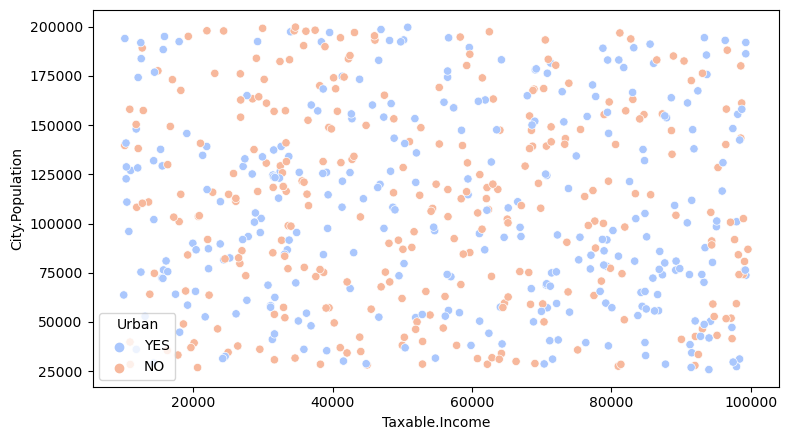

In [19]:
plt.figure(figsize=(8,4.5))
sns.scatterplot(data=df1,x='Taxable.Income',y='City.Population',hue='Urban',palette='coolwarm')
plt.tight_layout()
plt.savefig('City population vs Taxble income')
plt.show()

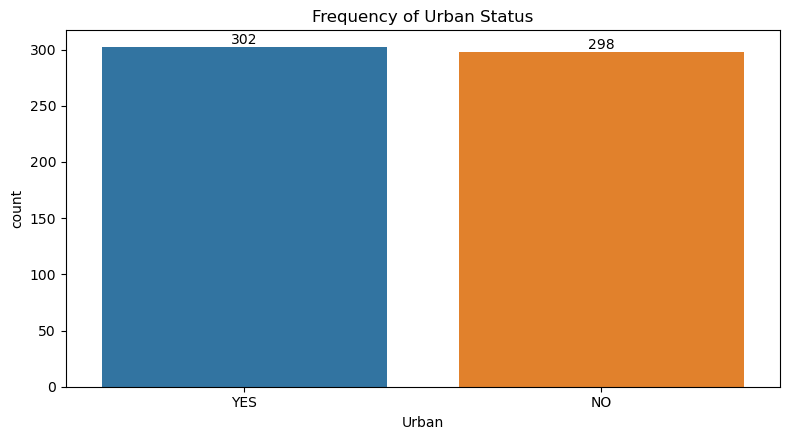

In [20]:
plt.figure(figsize=(8,4.5))
ax= sns.countplot(data=df1,x='Urban')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Frequency of Urban Status')
plt.tight_layout()
plt.savefig('Frequency of Urban Status')
plt.show()

### Inferance :- There are 302 people are living in a Urban and 298 people are in others.

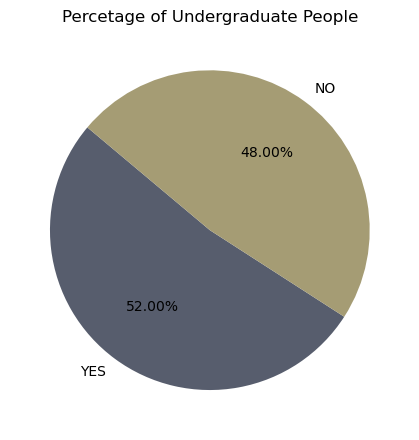

In [22]:
plt.figure(figsize=(8,4.5))
type_value_counts = df['Undergrad'].value_counts().head()
colors = sns.color_palette('cividis',len(type_value_counts))
plt.pie(type_value_counts,labels=type_value_counts.index,
       autopct='%1.2f%%',startangle=140,colors=colors,wedgeprops=None)
plt.title('Percetage of Undergraduate People')
plt.tight_layout()
plt.savefig('Percetage of Undergraduate People')
plt.show()

### Inferance :- The 52% people are undergraduate and 48% people are postgraduate.

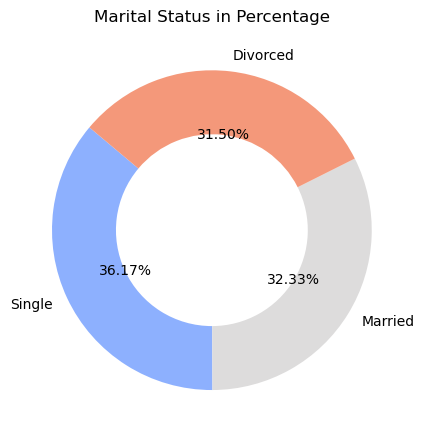

In [23]:
plt.figure(figsize=(8,4.5))
type_value_counts = df['Marital.Status'].value_counts().head()
colors = sns.color_palette('coolwarm',len(type_value_counts))
plt.pie(type_value_counts,labels=type_value_counts.index,
       autopct='%1.2f%%',startangle=140,colors=colors,wedgeprops=dict(width=0.4))
plt.title('Marital Status in Percentage')
plt.tight_layout()
plt.savefig('Marital Status in Percentage')
plt.show()

### Inferance - There are 36% people are single and 32% people are married and 31.5% people are divorced.

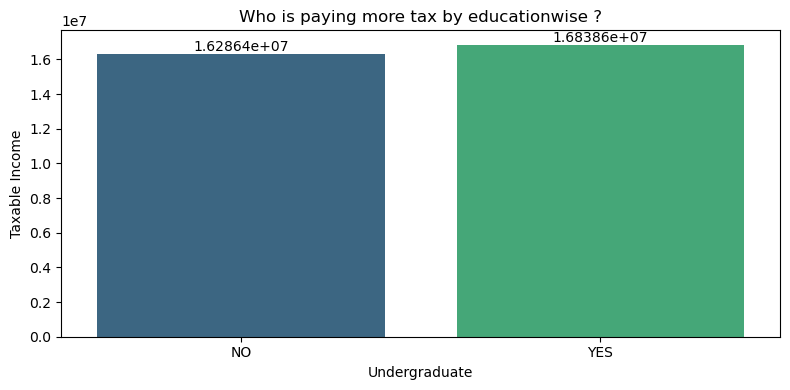

In [24]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df1,x='Undergrad',y='Taxable.Income',errorbar=None,estimator='sum',palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Who is paying more tax by educationwise ?')
plt.xlabel('Undergraduate')
plt.ylabel('Taxable Income')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Who is paying more tax by educationwise')
plt.show()

### Inferance :- The taxable income of undergraduate people are more as compared to others.

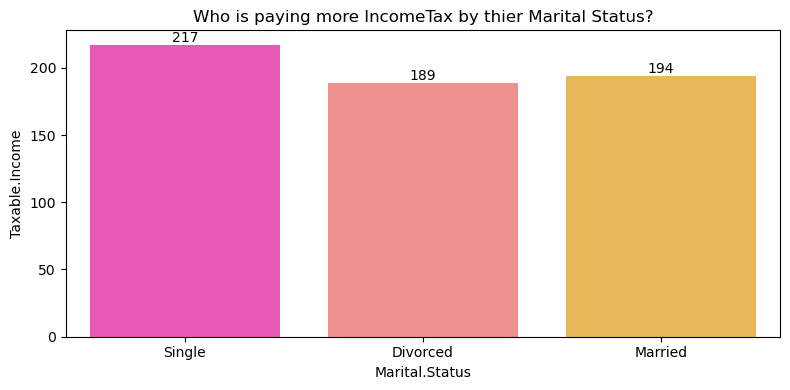

In [25]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df1,x='Marital.Status',y='Taxable.Income',errorbar=None,estimator='count',palette='spring')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Who is paying more IncomeTax by thier Marital Status?')
# plt.xlabel('Unit sales in thousands')
# plt.ylabel('Store in Urban or Rural Location')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Who is paying more IncomeTax by thier Marital Status')
plt.show()

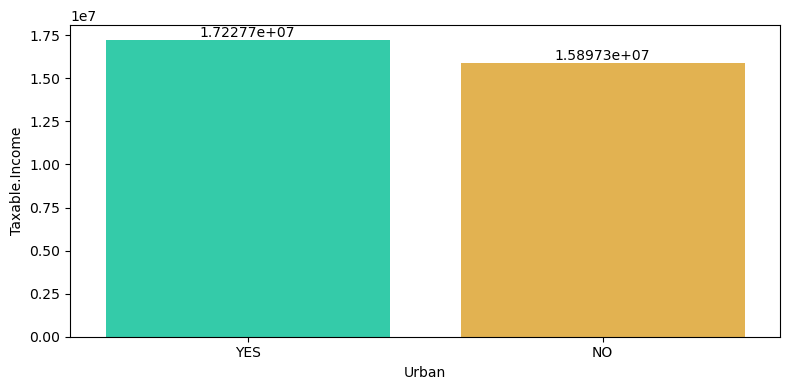

In [26]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df1,x='Urban',y='Taxable.Income',errorbar=None,estimator='sum',palette='turbo')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('')
# plt.xlabel('Unit sales in thousands')
# plt.ylabel('Store in Urban or Rural Location')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Taxable income vs urban')
plt.show()

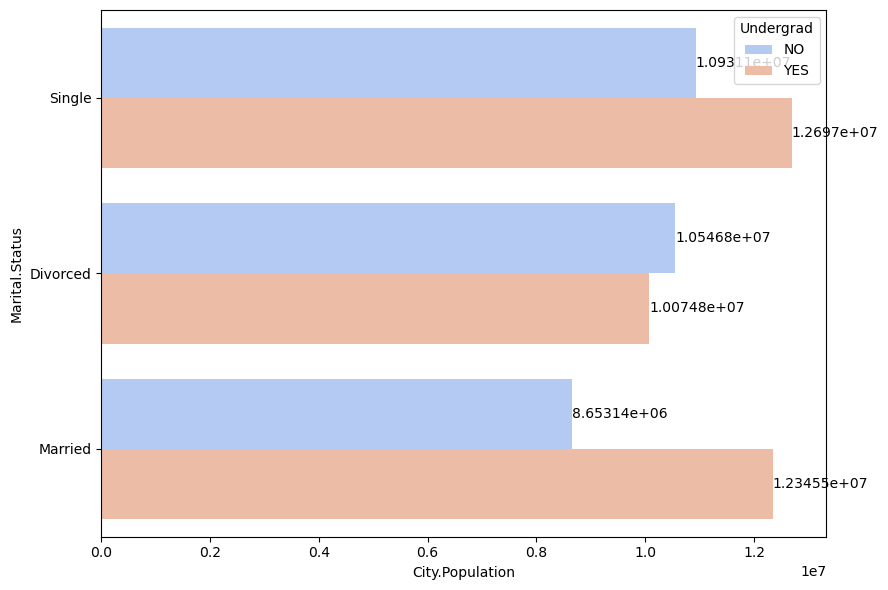

In [13]:
plt.figure(figsize=(9,6))
ax = sns.barplot(data=df1,x='City.Population',y='Marital.Status',errorbar=None,estimator='sum',palette='coolwarm',hue='Undergrad')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('')
# plt.xlabel('Unit sales in thousands')
# plt.ylabel('Store in Urban or Rural Location')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

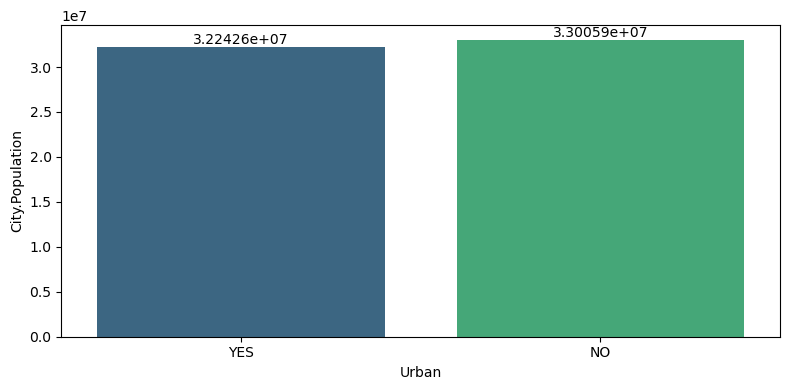

In [14]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df1,x='Urban',y='City.Population',errorbar=None,estimator='sum',palette='viridis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('')
# plt.xlabel('Unit sales in thousands')
# plt.ylabel('Store in Urban or Rural Location')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

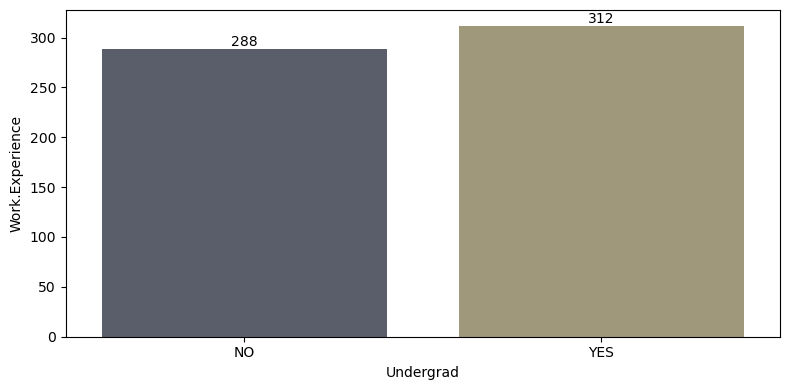

In [27]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df1,x='Undergrad',y='Work.Experience',errorbar=None,estimator='count',palette='cividis')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('')
# plt.xlabel('Unit sales in thousands')
# plt.ylabel('Store in Urban or Rural Location')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('Number of Ungraduate people')
plt.show()

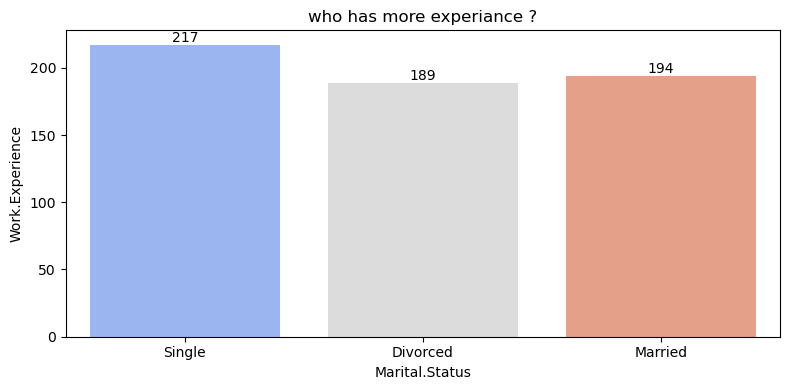

In [28]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df1,x='Marital.Status',y='Work.Experience',errorbar=None,estimator='count',palette='coolwarm')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('')
# plt.xlabel('Unit sales in thousands')
# plt.ylabel('Store in Urban or Rural Location')
plt.xticks(rotation=0)
plt.title('who has more experiance ?')
plt.tight_layout()
plt.savefig('who has more experiance')
plt.show()

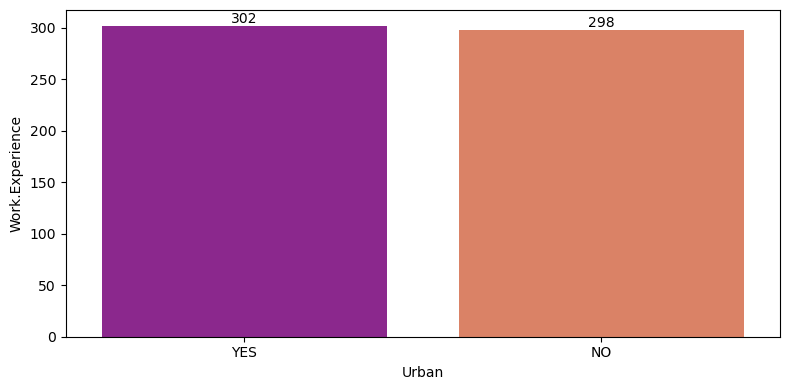

In [17]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df1,x='Urban',y='Work.Experience',errorbar=None,estimator='count',palette='plasma')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('')
# plt.xlabel('Unit sales in thousands')
# plt.ylabel('Store in Urban or Rural Location')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()